# Stack plot in `Pyleoclim`

In [1]:
%load_ext autoreload
%autoreload 2
    
import pyleoclim as pyleo
import pandas as pd
import numpy as np

## Load Euro2k LiPD files

In [2]:
dataset = pyleo.Lipd(usr_path='../example_data/Euro2k') 
ts_list = dataset.to_tso()

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 31 LiPD file(s)
reading: Ocn-RedSea.Felis.2000.lpd
reading: Arc-Forfjorddalen.McCarroll.2013.lpd
reading: Eur-Tallinn.Tarand.2001.lpd
reading: Eur-CentralEurope.Dobrovoln.2009.lpd
reading: Eur-EuropeanAlps.Bntgen.2011.lpd
reading: Eur-CentralandEasternPyrenees.Pla.2004.lpd
reading: Arc-Tjeggelvas.Bjorklund.2012.lpd
reading: Arc-Indigirka.Hughes.1999.lpd
reading: Eur-SpannagelCave.Mangini.2005.lpd
reading: Ocn-AqabaJordanAQ19.Heiss.1999.lpd
reading: Arc-Jamtland.Wilson.2016.lpd
reading: Eur-RAPiD-17-5P.Moffa-Sanchez.2014.lpd
reading: Eur-LakeSilvaplana.Trachsel.2010.lpd
reading: Eur-NorthernSpain.Martn-Chivelet.2011.lpd
reading: Eur-MaritimeFrenchAlps.Bntgen.2012.lpd
reading: Ocn-AqabaJordanAQ18.Heiss.1999.lpd
reading: Arc-Tornetrask.Melvin.2012.lpd
reading: Eur-EasternCarpathianMountains.Popa.2008.lpd
reading: Arc-PolarUrals.Wilson.2015.lpd
reading: Eur-LakeSilvaplana.Larocque-Tobler.2010.lpd
reading: Eur

In [3]:
ts_list[0].keys()

dict_keys(['mode', 'time_id', '@context', 'archiveType', 'createdBy', 'dataContributor', 'dataSetName', 'googleDataURL', 'googleMetadataWorksheet', 'googleSpreadSheetKey', 'originalDataURL', 'studyName', 'tagMD5', 'pub1_author', 'pub1_citeKey', 'pub1_dataUrl', 'pub1_issue', 'pub1_journal', 'pub1_pages', 'pub1_publisher', 'pub1_title', 'pub1_type', 'pub1_volume', 'pub1_year', 'pub1_doi', 'pub2_author', 'pub2_citeKey', 'pub2_dataUrl', 'pub2_issue', 'pub2_journal', 'pub2_pages', 'pub2_publisher', 'pub2_title', 'pub2_type', 'pub2_volume', 'pub2_year', 'pub2_doi', 'pub3_author', 'pub3_Urldate', 'pub3_citeKey', 'pub3_institution', 'pub3_title', 'pub3_type', 'pub3_url', 'geo_type', 'geo_meanLon', 'geo_meanLat', 'geo_meanElev', 'geo_ocean', 'geo_pages2kRegion', 'geo_siteName', 'lipdVersion', 'tableType', 'paleoData_paleoDataTableName', 'paleoData_paleoDataMD5', 'paleoData_googleWorkSheetKey', 'paleoData_measurementTableName', 'paleoData_measurementTableMD5', 'paleoData_filename', 'paleoData_ta

## Define `pyleoclim.Series()` objects

In [4]:
ts_dict = {}
flag = 'paleoData_useInGlobalTemperatureAnalysis'

for item in ts_list:
    dsn = item['dataSetName']
    if flag in item.keys() and item[flag] == 'TRUE':
        year = item['year']
        value = item['paleoData_values']
        lat = item['geo_meanLat']
        lon = item['geo_meanLon']
        cond_lat = np.min(lat) >= 20 and np.max(lat) <= 60
        cond_lon = np.min(lon) >= 0 and np.max(lon) <= 50
        
        if cond_lat & cond_lon:
            ts_dict[dsn] = pyleo.Series(
                time=year,
                value=value,
                label=dsn,
                time_name='Time',
                time_unit='yr',
                value_name=item['paleoData_variableName'],
                value_unit=item['paleoData_units'],
            ).slice([1600, 2000])

The time axis has been adjusted to be ascending!
The time axis has been adjusted to be ascending!
The time axis has been adjusted to be ascending!
Duplicated timestamps has been reduced by averaging values!
The time axis has been adjusted to be ascending!
The time axis has been adjusted to be ascending!
Duplicated timestamps has been reduced by averaging values!
The time axis has been adjusted to be ascending!


In [5]:
ts_dict.keys()
print(len(ts_dict))

17


## Define `pyleoclim.MultipleSeries` objects and visualize the data

In [6]:
ms = pyleo.MultipleSeries([ts for name, ts in ts_dict.items()])

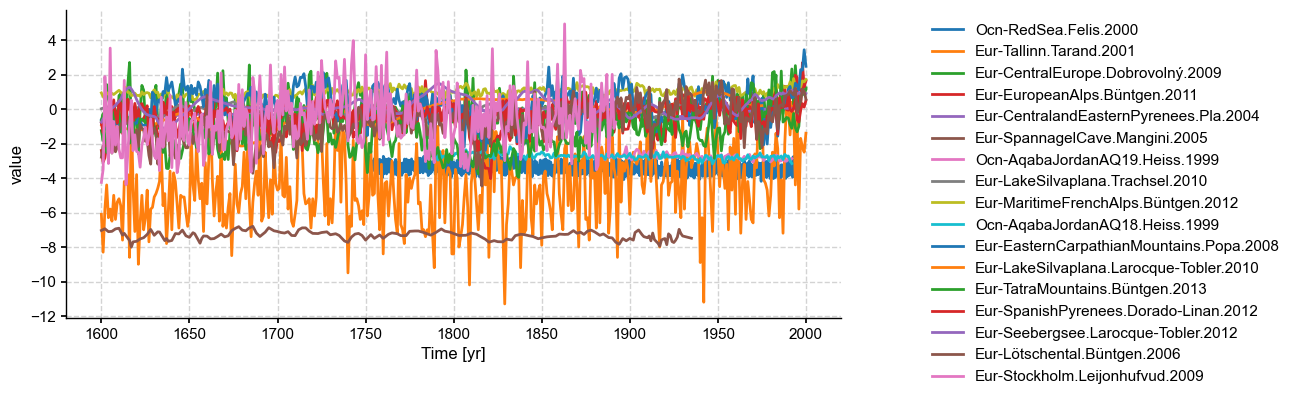

In [7]:
fig, ax = ms.plot(lgd_kwargs={'bbox_to_anchor': [1.1, 1]})

## Stack-plot the data 

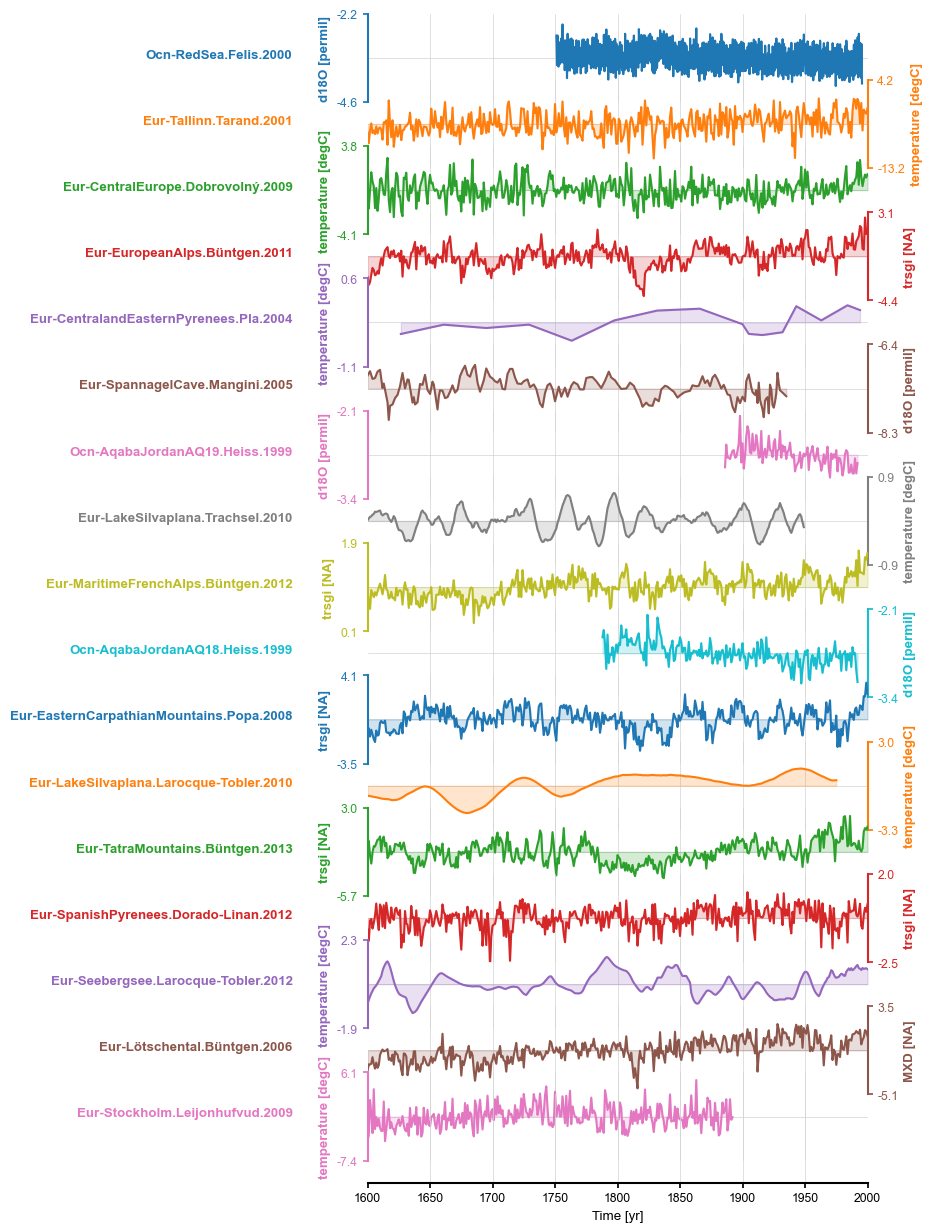

In [8]:
# default style
fig, ax = ms.stackplot()

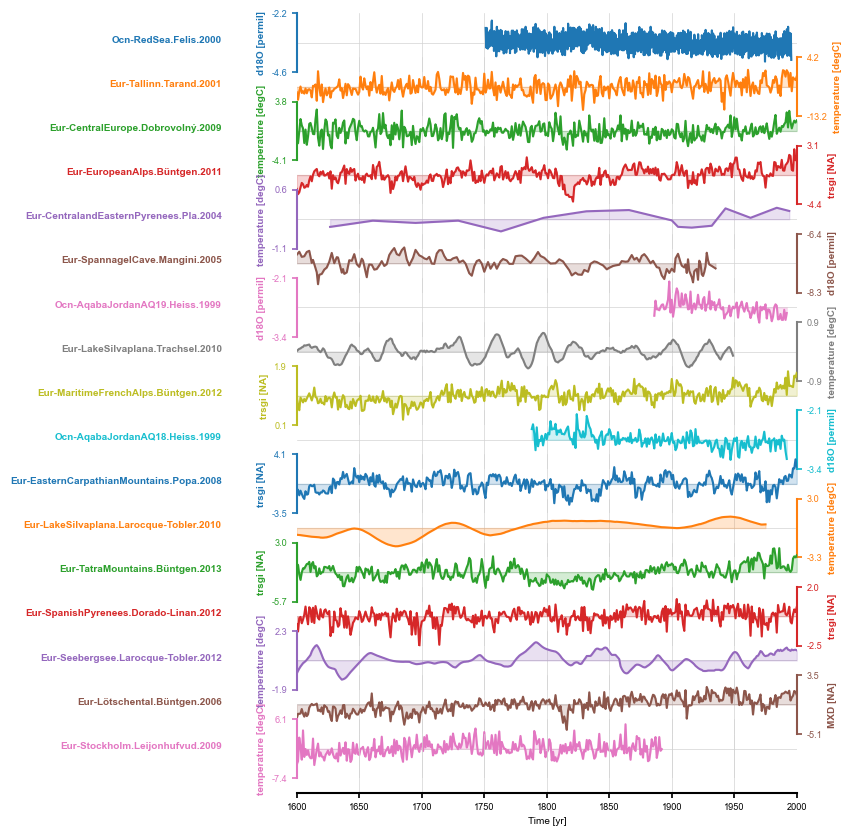

In [15]:
# adjust figsize and fontsize scale
fig, ax = ms.stackplot(figsize=[5, 10], font_scale=0.6)

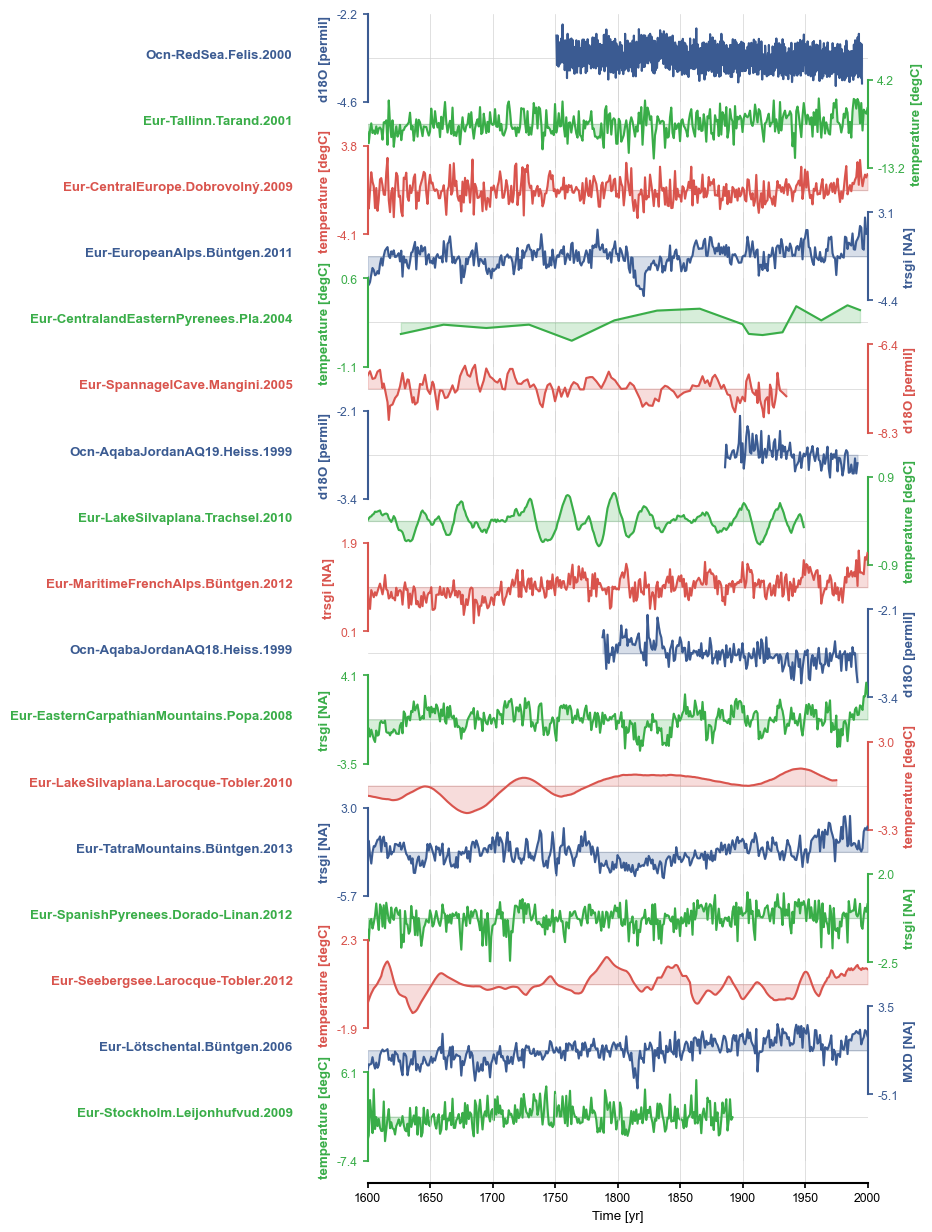

In [10]:
# specify a color list to cycle the colors for the curves
import seaborn as sns
clr_list = [
    sns.xkcd_rgb['denim blue'],
    sns.xkcd_rgb['medium green'],
    sns.xkcd_rgb['pale red'],
]
fig, ax = ms.stackplot(font_scale=0.8, colors=clr_list)

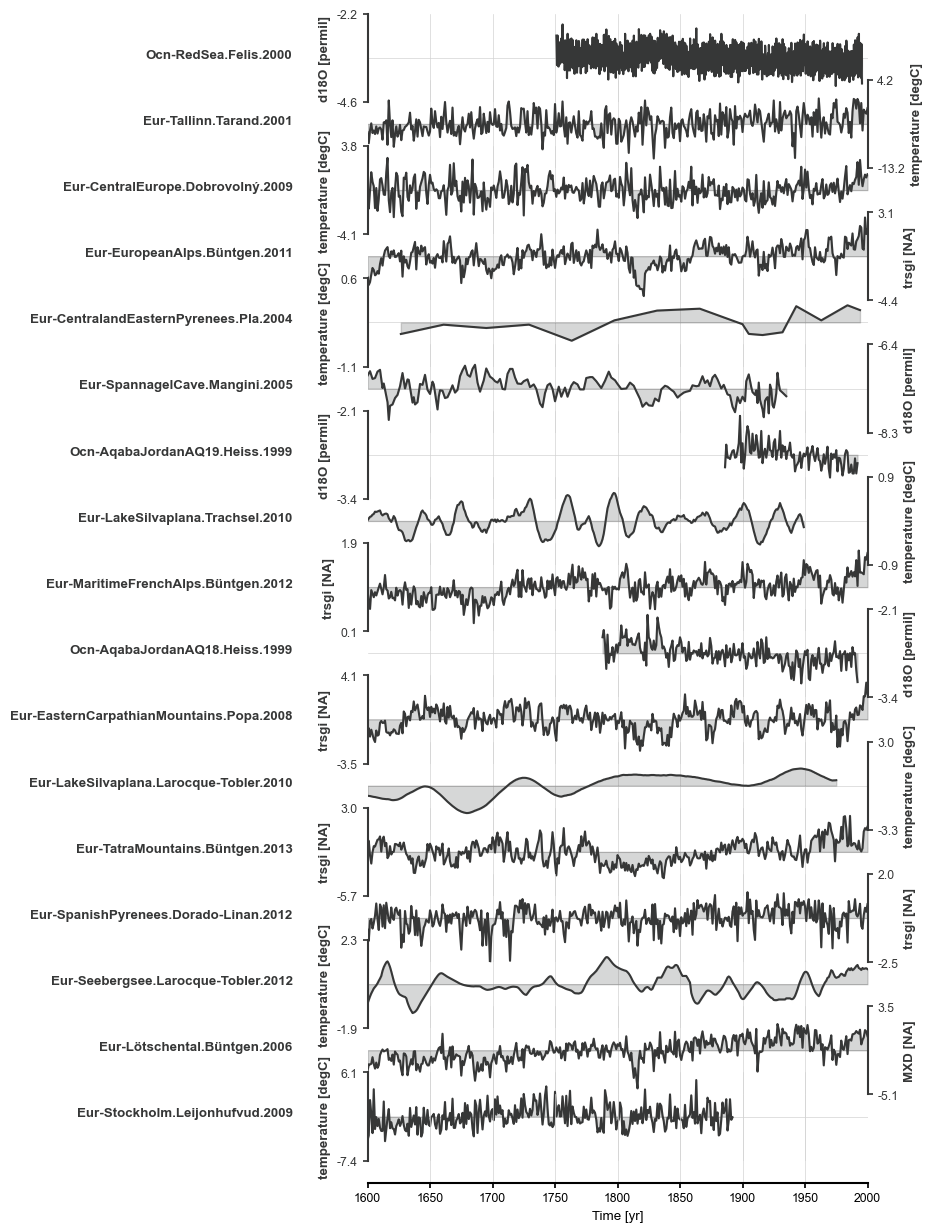

In [11]:
# if only one color is specified, then use it for all curves
fig, ax = ms.stackplot(font_scale=0.8, colors=sns.xkcd_rgb['dark grey'])